<a href="https://colab.research.google.com/github/ChoiSenn/E.B.S/blob/main/data_analysis/exercise/ch08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **데이터 분석과 머신러닝**
## 2022-05-18  다중 회귀와 규제

<br><br>

---

<br><br>

## 1. 변수가 여러 개인 공간에서의 회귀분석

<br><br>

좋은 머신러닝에서 모델을 일반적으로 **현재 데이터를 잘 설명하고, 미래 데이터에 대한 예측 성능이 좋은 모델**이다.

<br>

입력 특성이 여러 개일 경우, **다변량 회귀분석**이라고 한다.<br>

차원이 3을 넘어갈 경우, 시각적인 표현은 불가능하며 이러한 평면을 일반화하는 명칭이 필요한데, 이를 **초평면**이라고 한다.<br>
수학적 다변량 회귀분석에서 특징 벡터 x는 2개, 3개...와 같은 임의의 차원을 가질 수 있으며, 이 회귀분석에서 찾아야 하는 것은 n차원 공간의 **초평면**이 되는 것이다. 이를 **파라미터** 벡터로 표현할 수도 있다.<br>

선형 회귀에서 m개의 데이터 인스턴스에 대해 현재 가설의 **평균 제곱 오차**를 구할 수 있다. (각 데이터 인스턴스에 대해 구한 오차를 제곱하여 평균을 낸 값이다.)<br>

다변량 선형 회귀분석은 결국 이 오차가 최소가 되는 파라미터 세타를 찾는 문제이다.

<br><br>

---

<br><br>

## 2. 캐글 데이터를 이용해 분석한다.

<br><br>

세계보건기구에서 공개한 나라별 기대수명 데이터를 다운로드하여 읽어온다. 2000년부터 2015년까지의 나라별 기대수명과 보건 예산, 질병 통계, 비만도 등이 정리되어 있다.

<br>

이 데이터의 속성들을 이용하여 기대수명을 예측해본다. 어떤 변수들을 잘 조합해야 좋은 예측을 할 수 있을지, 대표적인 세 가지 방법은 다음과 같다.
1. **전역적 탐색법** : 속성 변수들의 가능한 모든 조합들로부터 최적의 모형을 찾는 방법.
2. **전진 선택법** : 기여도(상관도)가 높은 유의한 속성 변수부터 하나씩 추가하는 방법.
3. **후방 소거법** : 전체 속성들 중에서 기여도가 가장 낮은 속성부터 하나씩 제거하는 방법.

<br><br>

---

<br><br>

## 3. 기대수명 데이터 둘러보기

<br><br>

판다스 데이터프레임에 기대수명 데이터를 읽어들이고 출력한다.

In [6]:
import pandas as pd

path = 'https://github.com/dongupak/DataML/raw/main/csv/'
file = path + 'life_expectancy.csv'

life = pd.read_csv(file)
print(life.head(3))

       Country  Year      Status  Life expectancy  Adult mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   

   Infant deaths  Alcohol  Percentage expenditure  Hepatitis B  Measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   
2             66     0.01               73.219243         64.0      430  ...   

   Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0    6.0               8.16        65.0       0.1  584.259210  33736494.0   
1   58.0               8.18        62.0       0.1  612.696514    327582.0   
2   62.0               8.13        64.0       0.1  631.744976  31731688.0   

   Thinness 1-19 years  Thinness 5-9 years  Income composition of resources  \
0         

모두 22개의 열을 가진 모습이다.<br>

describe() 메소드를 이용해 데이터의 전체적인 특징을 살펴본다.

In [7]:
print(life.describe())

              Year  Life expectancy  Adult mortality  Infant deaths  \
count  2938.000000      2928.000000      2928.000000    2938.000000   
mean   2007.518720        69.224932       164.796448      30.303948   
std       4.613841         9.523867       124.292079     117.926501   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2004.000000        63.100000        74.000000       0.000000   
50%    2008.000000        72.100000       144.000000       3.000000   
75%    2012.000000        75.700000       228.000000      22.000000   
max    2015.000000        89.000000       723.000000    1800.000000   

           Alcohol  Percentage expenditure  Hepatitis B        Measles  \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.

전체 데이터에서 결측값이 없는 year 속성은 2,938개로 약 190개 국가의 16년 치 데이터가 존재함을 알 수 있다. 마지막 항목인 Schooling 속성은 2,775개로 163개의 결측 데이터가 존재함을 알 수 있다.<br>

이 데이터를 시본 라이브러리와 상관행렬을 이용하여 살펴본다.

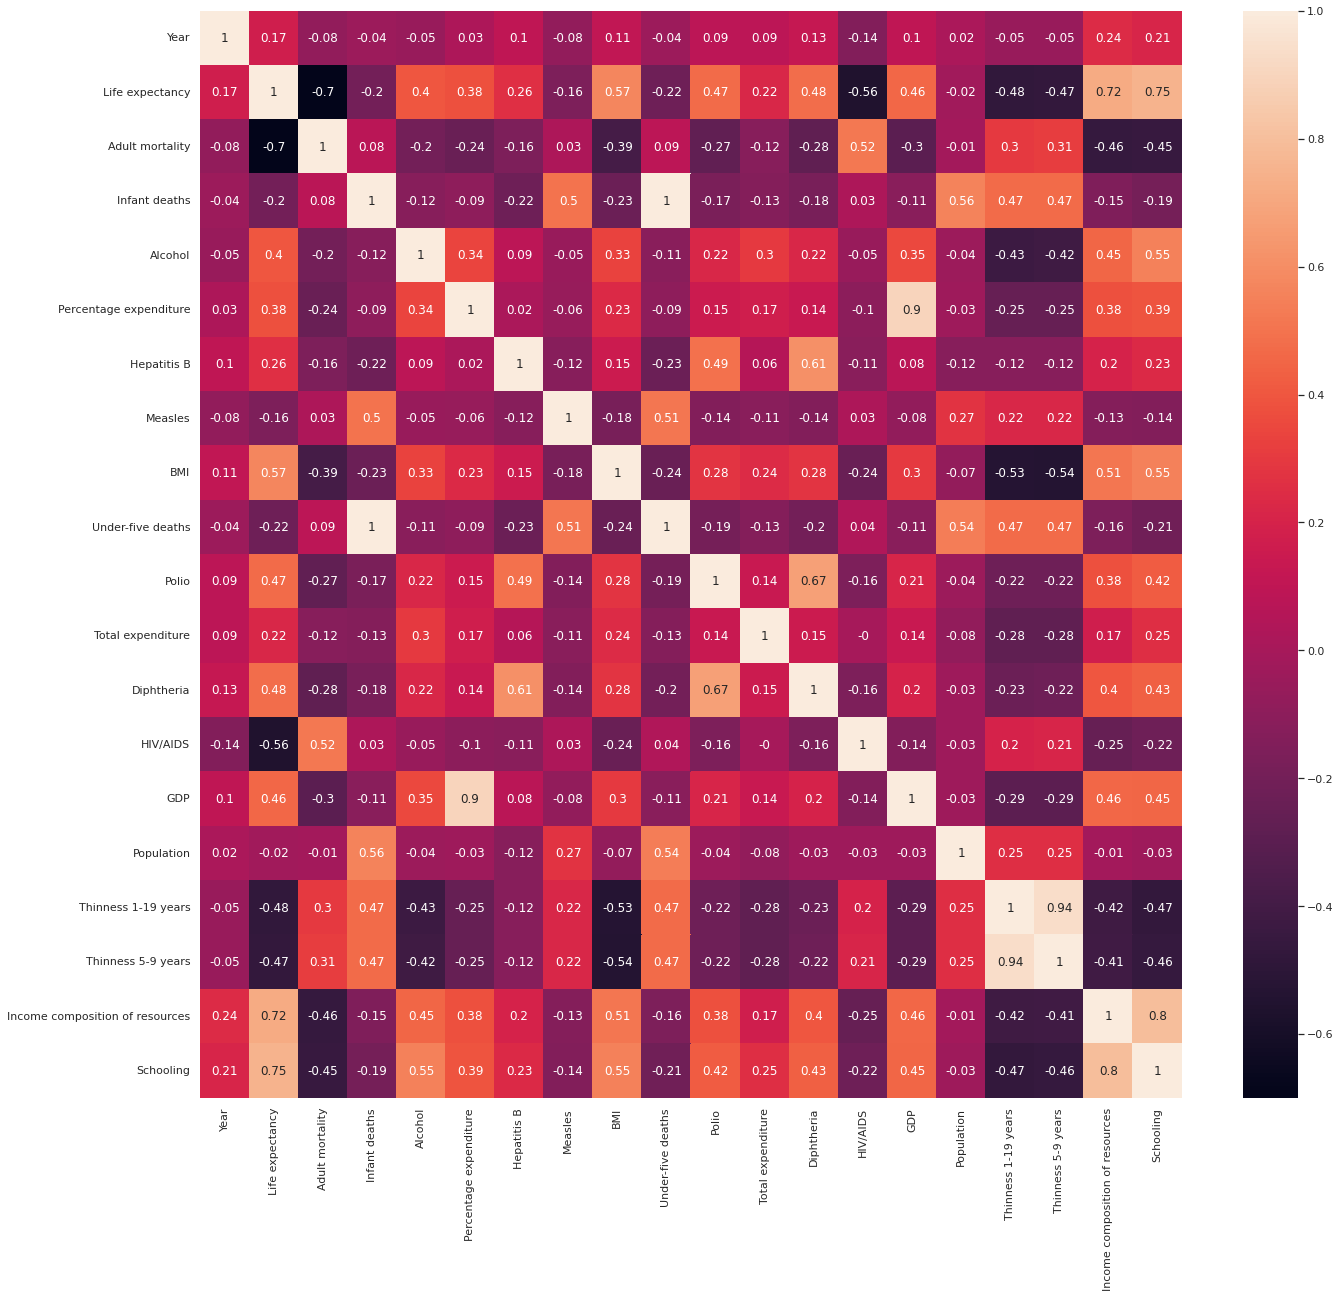

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize': (22, 20)})
correlation_matrix = life.corr().round(2)
sns.heatmap(data = correlation_matrix, annot = True)

<br><br>

---

<br><br>

## 4. 기대수명과 상관도가 높은 데이터는 무엇인가

<br><br>

기대수명과 다른 특성들과의 상관계수 값을 출력해본다.

In [ ]:
print(life.corr().round(3)['Life expectancy'])

Year                               0.170
Life expectancy                    1.000
Adult mortality                   -0.696
Infant deaths                     -0.197
Alcohol                            0.405
Percentage expenditure             0.382
Hepatitis B                        0.257
Measles                           -0.158
BMI                                0.568
Under-five deaths                 -0.223
Polio                              0.466
Total expenditure                  0.218
Diphtheria                         0.479
HIV/AIDS                          -0.557
GDP                                0.461
Population                        -0.022
Thinness 1-19 years               -0.477
Thinness 5-9 years                -0.472
Income composition of resources    0.725
Schooling                          0.752
Name: Life expectancy, dtype: float64


Year, Polulation과는 상관도가 낮은 반면, Adult mortality, Schooling 등은 각각 음/양의 방향으로 상관도가 높은 것을 확인할 수 있다.<br>

상관도의 절대값이 높은 순으로 정렬하고 상위 7개를 확인한다.

In [13]:
import numpy as np

c = life.corr().round(2)['Life expectancy']
c = np.abs(c)
print(c.sort_values(ascending=False)[1:8])

Schooling                          0.75
Income composition of resources    0.72
Adult mortality                    0.70
BMI                                0.57
HIV/AIDS                           0.56
Thinness 1-19 years                0.48
Diphtheria                         0.48
Name: Life expectancy, dtype: float64


Schooling이 가장 높은 상관관계를 가지며, Income...과 Adult...가 그 다음으로 높은 상관도를 갖는 것을 알 수 있다. 모두 0.7 이상의 비교적 높은 값이다.<br>

기대수명과 상관도가 가장 높은 항목이 학교 재학 연수라는 점이 인상적이다. 교육 수준이 높은 나라가 국민의 보건과 건강에 대한 관심도가 높아 기대수명도 높을 것이라는 추측을 해볼 수 있다. 

<br>

홍역 예방접종률(Measles)과 유아 1,000명당 사망자 수(Infant deaths)와 같은 보건 지표가 기대수명에 영향을 줄 수 있을 것 같지만, 기대수명과의 상관도가 약하다는 것을 알 수 있다.

In [14]:
print(c.sort_values(ascending=False)[-6:-1])

Under-five deaths    0.22
Total expenditure    0.22
Infant deaths        0.20
Year                 0.17
Measles              0.16
Name: Life expectancy, dtype: float64


<br>

- **귀납적 탐구** : 자연현상에서 관찰한 결과들을 종합하여 결론을 이끌어나가는 과정. 연구의 대상에서 일치하거나 공통적인 성질 또는 법칙을 뽑아내어 결론을 도출한다. 별도의 가설을 미리 설정할 필요가 없으며, 있는 그대로의 현상을 관찰하고 그 현상에 부합하는 원리를 추론한다.
- **연역적 탐구** : 문제를 인식하여 그 문제를 해결, 이해할 수 있는 가설을 설정한 뒤 그 가설을 검증하는 과정이다.

<br><br>

---

<br><br>

## 5. 기대수명과 특성 분석

<br><br>

기대수명과 상관도가 높은 5개의 특성에 대한 쌍 그래프를 그린다.

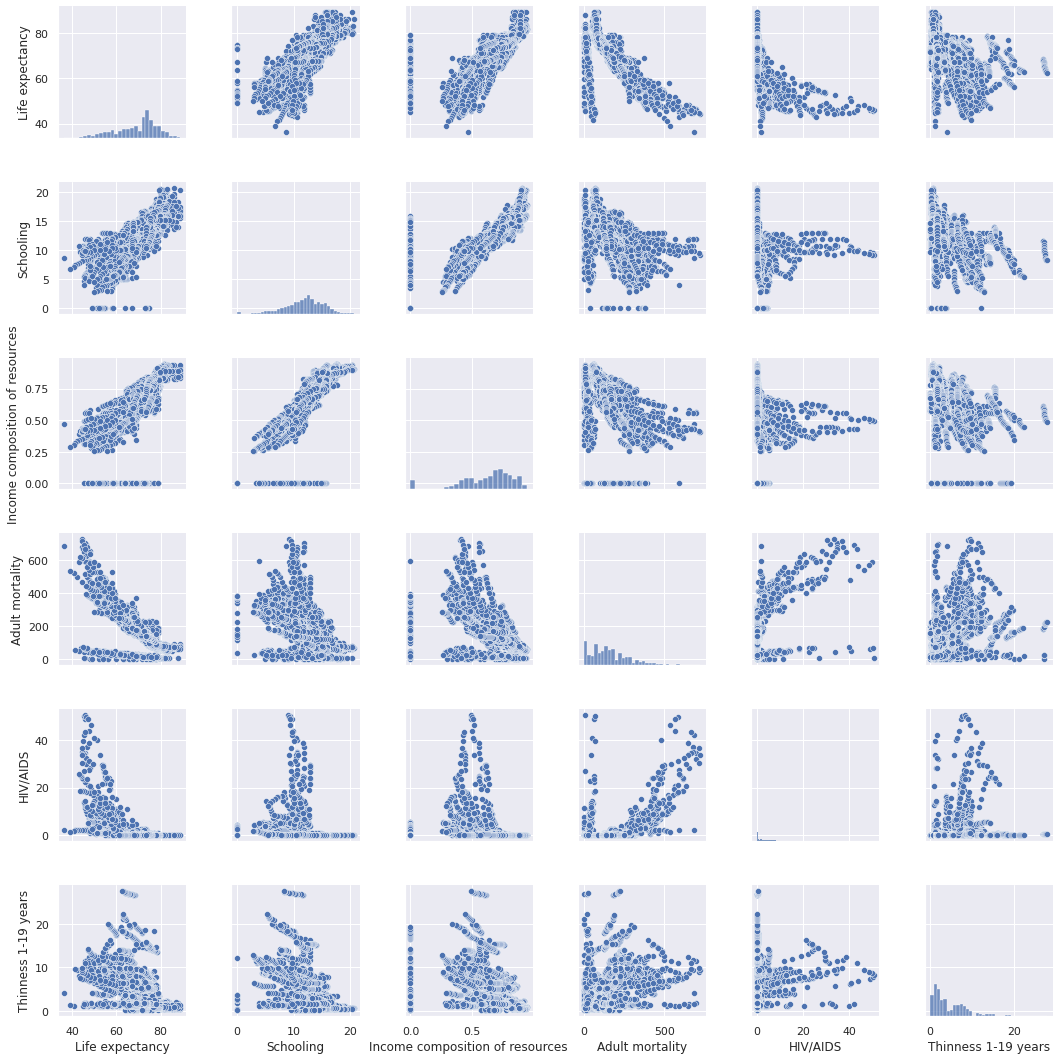

In [15]:
sns.pairplot(life[['Life expectancy', 'Schooling', 'Income composition of resources', 'Adult mortality', 'HIV/AIDS', 'Thinness 1-19 years']])
plt.show()

쌍 그래프 시각화 결과 역시 기대수명과 상관도가 높은 Schooling, Income... 특성이 대각선 모양의 분포를 띈다.<br>

이제 이 상관도가 높은 특성들로 선형 회귀 모델을 만든다. 전처리를 위해 isna().sum() 메소드를 이용하여 결측 데이터 개수를 살펴본다.

In [16]:
life[['Schooling', 'Income composition of resources','Adult mortality', 'HIV/AIDS','Thinness 1-19 years']].isna().sum()

Schooling                          163
Income composition of resources    167
Adult mortality                     10
HIV/AIDS                             0
Thinness 1-19 years                 34
dtype: int64

각 특성들마다 결측 데이터가 몇 개인지 확인할 수 있다.<br>

dropna() 메소드를 이용해 결측 데이터를 삭제하고, 선형 회귀 모델의 입력으로 사용할 데이터 X를 만들고 선형 회귀 모델의 정답 값 y를 Life expectancy로 둔다.

In [18]:
life.dropna(inplace=True) # 결측값 제거

X = life[['Schooling', 'Income composition of resources', 'Adult mortality', 'HIV/AIDS', 'Thinness 1-19 years']]
y = life['Life expectancy']

선형 회귀 모델을 생성하기 위한 LinearRegression 모듈을 import한다.<br>

훈련용 데이터 집합을 따로 만들어둔다.

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2)
regr = LinearRegression()
regr.fit(X_train, y_train)
print('선형회귀 모델의 점수=', regr.score(X_test, y_test).round(3))

선형회귀 모델의 점수= 0.823


모델 regr에 아직 훈련 시 반영하지 못한 X_test 데이터를 넣어 점수를 매긴 모습이다. 79.2점 정도의 값이 나오는 모습이다.

<br><br>

---

<br><br>

## 6. 훈련 데이터, 검증 데이터 그리고 특성

<br><br>

모델이 특정한 학습 데이터에만 최적화되어 좋은 성능을 보이고, 새로운 데이터에 대해서는 좋은 성능을 나타내지 못하는 경우를 데이터의 일반화 능력이 부족하다고 보며, **과적합** 되었다고 한다.

<br>

사이킷런의 train_test_split() 함수는 입력 데이터와 레이블을 랜덤하게 섞어 일부는 학습, 일부는 테스트 데이터로 나누어주는 일을 한다.<br>
학습 데이터로 모델을 학습시키고 테스트 데이터를 이용해 모델을 평가하며, 이 모델이 새로운 데이터에 대해 어느 정도의 정확도를 보일지 예측한다.<br>

호출할 때마다 난수 값을 이용해 무작위로 데이터를 섞어주므로 최종성능평가를 하면, 정확도에 약간의 차이가 날 수도 있다.

<br>

데이터의 특성을 살펴본다. 이번에는 문자열로 되어있는 부분을 제외하고 입력 데이터의 대부분의 특징을 다 사용한다.

In [20]:
life = pd.read_csv(file)

life.dropna(inplace=True) # 결측값 제거

X = life[['Year','Adult mortality','Infant deaths', 'Alcohol', 'Percentage expenditure','Hepatitis B', 'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Total expenditure','Diphtheria', 'HIV/AIDS', 'GDP', 'Population','Thinness 1-19 years','Thinness 5-9 years', 'Income composition of resources', 'Schooling']]
y = life['Life expectancy']

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
regr = LinearRegression()
regr.fit(X_train, y_train)
print('선형회귀 모델의 점수 =', regr.score(X_test, y_test).round(3))

선형회귀 모델의 점수 = 0.839


아까 5개의 특성을 이용한 것과 달리 이번에는 19개나 되는 특성을 학습에 사용했다. 그러나 그만큼 큰 성능의 향상이 이루어지지는 않았다.<br>

> **쓸모없는 데이터가 입력으로 들어가면 쓸모없는 결과만 나올 뿐이다.**

특성에 대한 분석을 우선적으로 한 후에 이 특성을 바탕으로 선형 회귀 모델을 만드는 것이 바람직하다.

<br><br>

---

<br><br>

## LAB 1. 상관도를 시각화하여 중요 특성을 분석하자

<br>

- 특성 공학 : 특성들의 중요도를 파악하여 선택하고 때로는 이 특성들을 결합하는 과정.

<br>

### 상관도의 절대값 크기에 따라 막대그래프 그리기 - 특성을 읽어서 상관계수를 구한 다음 상관계수가 1인 Life expectancy는 제거하자.

Text(0, 0.5, 'Correlation Coef')

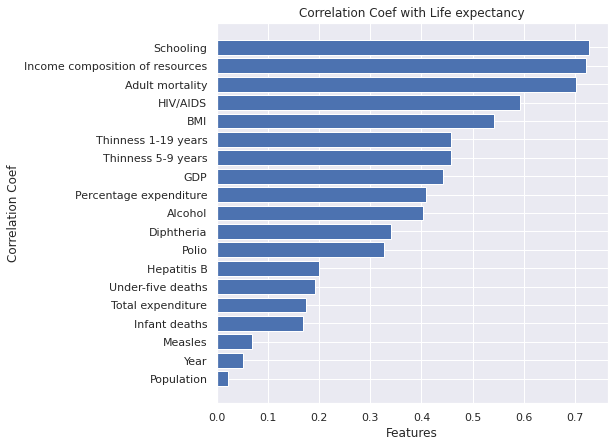

In [ ]:
life = pd.read_csv(file)
life.dropna(inplace=True) # 결측값 제거

X = life[['Year','Adult mortality','Infant deaths', 'Alcohol', 'Percentage expenditure','Hepatitis B', 'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Total expenditure','Diphtheria', 'HIV/AIDS', 'GDP', 'Population','Thinness 1-19 years','Thinness 5-9 years', 'Income composition of resources', 'Schooling']]

# 상관계수를 구함
c = life.corr()['Life expectancy']
c = np.abs(c)
c.sort_values(ascending=True, inplace=True)
c = c[:-1] # Life expectancy는 제거
plt.figure(figsize=(7,7))
plt.barh(c.index, c.values)
plt.title('Correlation Coef with Life expectancy')
plt.xlabel('Features')
plt.ylabel('Correlation Coef')

<br><br>

---

<br><br>

## 7. 데이터의 분포가 직선이 아니라면 : 다항 회귀 모델 사용

<br><br>

설명 변수와 정답이 선형적인 관계가 아니라 곡선 형태로 되어있는 데이터 분포를 설명하기 위해 다항 회귀 모델을 이용한다.<br>

우선 x/y축 방향에 잡음이 추가된 y = 0.5x^2 + 2x + 1의 곡선을 만든다.

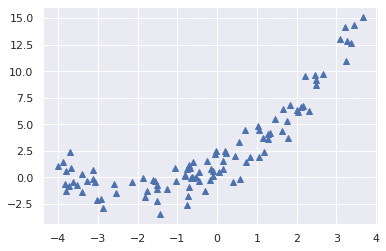

In [ ]:
m = 100    # 생성할 데이터의 갯수
# 평균값이 0이고 -4에서 4사이에 분포하는 랜덤 값 X
X = 8 * np.random.rand(m, 1) - 4 
# x^2항의 계수가 0.5, x항의 계수가 2, 상수항의 계수가 1
y = 0.5 * X ** 2 + 2 * X + 1 + np.random.randn(m, 1)

plt.figure(figsize=(6,4))
plt.plot(X, y, "b^")

이제 선형 회귀 모델을 만들고 모델의 점수와 계수, 절편을 살펴보고, 선형 회귀 직선을 그린다.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

regr = LinearRegression()
regr.fit(X, y)
print('선형회귀 모델의 점수 :', regr.score(X, y).round(3))
print('선형회귀 모델의 계수와 절편 :', regr.coef_, regr.intercept_)

선형회귀 모델의 점수 : 0.653
선형회귀 모델의 계수와 절편 : [[1.62875401]] [2.91433549]


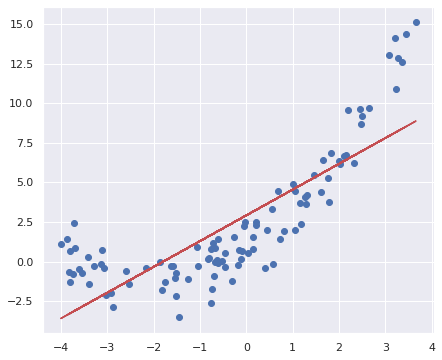

In [ ]:
plt.figure(figsize=(7,6))
y_predict = regr.predict(X)
plt.scatter(X, y)
plt.plot(X.flatten(), y_predict, color='r')

데이터의 분포는 2차 방정식인데 이를 1차 방정식으로 모델링하여 그리니 붉은색의 회귀 직선과 실제 데이터의 분포 간의 차이가 발생하고 점수가 낮게 나온 모습이다.

<br><br>

---

<br><br>

## 도전문제 2. 3차 방정식을 이용한 데이터 생성과 시각화

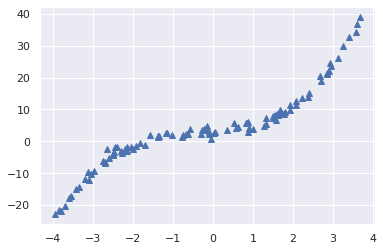

In [ ]:
m = 100    # 생성할 데이터의 갯수
# -4에서 4사이에 분포하는 랜덤 값 X
X = 8 * np.random.rand(m, 1) - 4 
# x^2항의 계수가 0.5, x항의 계수가 2, 상수항의 계수가 1
y = 0.5 * X ** 3 + 0.5 * X ** 2 + X + 3 + np.random.randn(m, 1)

plt.figure(figsize=(6,4))
plt.plot(X, y, "b^")

<br><br>

---

<br><br>

## 8. 다항 회귀 모델 사용

<br><br>

사이킷런의 전처리 서브 모듈인 preprocessing을 이용하여 다항 회귀를 수행한다. PolynomialFeatures() 클래스는 임의의 차수를 가지는 다항 특성을 추가하는 기능이 있다.

In [1]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

X = np.arange(2).reshape(-1, 1)
print(X)

[[0]
 [1]]


In [2]:
poly = PolynomialFeatures()
X = poly.fit_transform(X)
print(X)
print(poly.get_feature_names())

[[1. 0. 0.]
 [1. 1. 1.]]
['1', 'x0', 'x0^2']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


다항 특성 중에서 '1'은 편향 값이며 편향값을 생성하지 않을 경우, 생성자에 include_bias = False 값을 주면 된다.<br>

데이터 X에 대해 다항 특성을 추가한 후, 회귀 모델에 넣어 학습시킨다.

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

m = 100 
X = 8 * np.random.rand(m, 1) - 4 
y = 0.5 * X ** 2 + 2 * X + 1 + np.random.randn(m, 1)

poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
regr = LinearRegression()
regr.fit(X_poly, y)
print('다항 회귀 모델의 점수 =', regr.score(X_poly, y).round(3))
print('다항 회귀 모델의 계수 =', regr.coef_, '절편 =', regr.intercept_)

다항 회귀 모델의 점수 = 0.968
다항 회귀 모델의 계수 = [[1.98215054 0.50192217]] 절편 = [1.12885572]


x와 함께 x^2 항을 가진 다항 회귀 모델 X_poly를 사용한 선형 회귀 모델의 점수는 96.8%로 높은 모습이다.
<br>

이제 -4에서 4 사이의 입력값 domain을 생성하고 이에 대한 다항 특성을 추가하고 입력으로 넣어 그래프를 그린다.

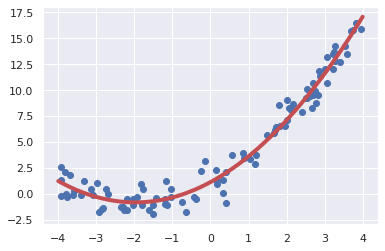

In [9]:
domain = np.linspace(-4, 4, 50).reshape(-1, 1)
domain_2 = poly_features.fit_transform(domain)

plt.figure(figsize=(6,4))
y_predict = regr.predict(domain_2)
plt.scatter(X, y)
plt.plot(domain, y_predict, color='r', linewidth=4)

다항 회귀 모델 regr이 2차 방정식으로 생성한 입력 데이터의 분포를 잘 예측하고 있음을 알 수 있다. 다항 회귀 모델에서 데이터의 추세를 나타내는 분포에서 n-1개의 굴절이 관찰되면 일반적으로 n차 다항식으로 모델링한다.

<br><br>

---

<br><br>

## LAB 2. 3차 방정식을 만들고 다항 회귀 모델을 이용하여 예측하기

다항 회귀 모델의 점수 = 0.997
다항 회귀 모델의 계수 = [[1.12559108 0.48241889 0.48803755]]
절편 = [3.18482582]


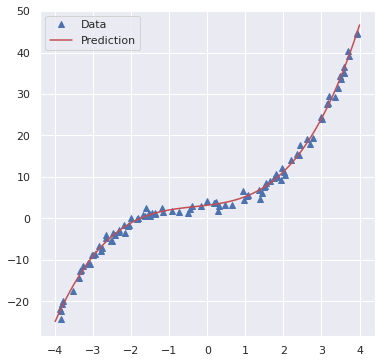

In [11]:
m = 100
X = 8 * np.random.rand(m, 1) - 4
y = .5 * X ** 3 + .5 * X ** 2 + X + 3 + np.random.randn(m, 1)

poly_features = PolynomialFeatures(degree = 3, include_bias = False)
X_poly = poly_features.fit_transform(X)
regr = LinearRegression()
regr.fit(X_poly, y)

print('다항 회귀 모델의 점수 =', regr.score(X_poly, y).round(3))
print('다항 회귀 모델의 계수 =', regr.coef_)
print('절편 =', regr.intercept_)

X_new = np.linspace(-4, 4, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = regr.predict(X_new_poly)

plt.figure(figsize=(6,6))
plt.plot(X, y, "b^", label='Data')
plt.plot(X_new, y_new, "r-", label="Prediction")
plt.legend()

<br><br>

---

<br><br>

## 9. 과대 적합에 주의

<br><br>

다항 회귀 모델의 항이 많아지고 차수가 커질수록 모델의 표현 능력은 좋아진다. 그렇다면 차수가 20인 다항 방정식을 만들어보자.

다항 회귀 모델의 점수 = 1.0
다항 회귀 모델의 계수 = [[ 4.44567452e+00  2.34194042e+01 -1.43984055e+01  2.57299463e+00
  -5.24817866e+00 -8.22643628e+00  3.37785436e+00 -7.58422536e+00
   6.84252281e+00  4.52679030e-01  2.54331328e+00  6.80022262e+00
  -4.90674688e+00 -3.79782567e+00  1.64645940e+00  8.20120131e-01
  -2.08067837e-01 -7.82897808e-02  8.81206405e-03  2.78855456e-03]]
절편 = [-3.52984088]


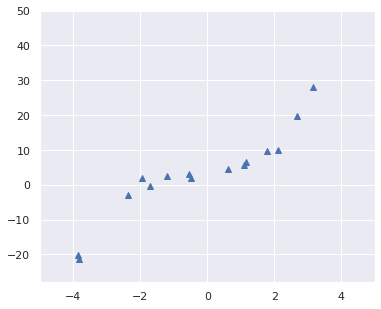

In [22]:
m = 20
X = 8 * np.random.rand(m, 1) - 4
y = .5 * X ** 3 + .5 * X ** 2 + X + 3 + np.random.randn(m, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y)

plt.figure(figsize=(6,5))
plt.xlim(-5, 5); plt.ylim(-28, 50) # x, y 범위를 제한함
plt.plot(X_train, y_train, "b^") # 학습용 데이터를 그리자

poly_features = PolynomialFeatures(degree = 20, include_bias = False)
X_poly = poly_features.fit_transform(X_train)
regr = LinearRegression()
regr.fit(X_poly, y_train)

print('다항 회귀 모델의 점수 =', regr.score(X_poly, y_train).round(3))
print('다항 회귀 모델의 계수 =', regr.coef_)
print('절편 =', regr.intercept_)

다항 회귀 모델의 점수를 살펴보면 1.0으로 모든 학습용 데이터를 다 지나는 함수가 만들어졌다는 것을 알 수 있다.<br>

이제 이렇게 좋은 점수가 나온 모델에 테스트 데이터를 넣어본다.

테스트 데이터에 대한 모델의 점수 = -259873.90901601908


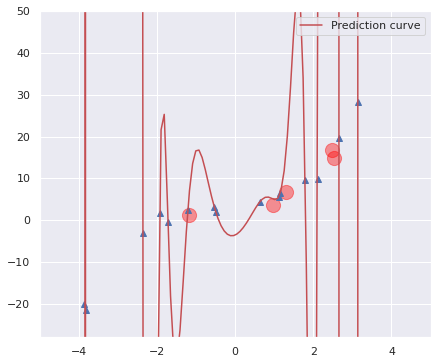

In [23]:
X_poly = poly_features.fit_transform(X_test)
print('테스트 데이터에 대한 모델의 점수 =', regr.score(X_poly, y_test))

X_new = np.linspace(-4, 4, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = regr.predict(X_new_poly)

plt.figure(figsize=(7,6))
plt.xlim(-5, 5); plt.ylim(-28, 50) # x, y 범위를 제한함

plt.plot(X_train, y_train, 'b^')
plt.scatter(X_test, y_test, c='red', s=200, alpha=0.4)
plt.plot(X_new, y_new, "r-", label="Prediction curve")
plt.legend()

매우 나쁜 결과와 함께 테스트용 데이터를 지나지 않고 학습용 데이터만 지나는 회귀모델임을 확인할 수 있다.

<br><br>

---

<br><br>

## 10. 과소 적합, 과대 적합, 그리고 규제

<br><br>

다항 특성을 데이터의 수보다 많이 만들면 이 모델은 학습용 데이터에 **과대 적합**되어 검증을 위한 데이터에 대해서는 매우 나쁜 성능을 보여줄 수 밖에 없다.<br>

또 다른 문제점은 다항식의 차수가 높아질수록 입력의 크기가 폭발적으로 증가한다는 것이다.

<br>

반대로 데이터의 분포가 비선형이지만 단순한 직선으로만 데이터를 모델링한다면 새로운 데이터를 전혀 예측하지 못할 것이다.이를 **과소 적합**이라고 한다.

<br>

개선 방법은 다음과 같다.

- **과소 적합** : 학습 모델의 복잡도를 증가시킨다. 데이터의 특성을 변경하거나 늘려본다. 데이터의 특성을 여러 개 사용하는 다변량 회귀와 차수를 증가시키는 다항 회귀가 있다.
- **과대 적합** : 학습 모델의 복잡도를 감소시킨다. 데이터를 더 많이 제공한다.

<br>

**규제**는 과대 적합 문제를 해결하기 위해 도입되었다. 모델이 마음대로 움직이지 못하게 제한하여 모델의 학습을 방해하는 방식으로 일반화 능력을 높이는 방법이다. 대표적으로 릿지 회귀, 라쏘 회귀, 엘라스틱 넷 등이 있다.

<br><br>

---

<br><br>

## 11. 최적화와 릿지 회귀

<br><br>

선형 회귀에서의 최적화의 의미는, **선형 회귀 모델의 비용함수 값을 최소화하는 방향으로 모델을 만드는 것이 바로 최적화**일 것이다. 이를 달성하기 위해 차수가 높은 다항식을 만들고 정밀한 계수값을 사용하면 데이터를 잘 설명하는 모델이 만들어질 수 있을 것이다.<br>

그러나 이 최적화된 모델은 현재 데이터를 잘 설명하는 모델이지만 미래 데이터에 대한 예측 성능이 좋은 모델은 아니라는 문제점이 있었다.<br>

이러한 문제점을 해결하기 위해 **릿지 회귀에서 벌칙항**을 이용하여 현재 데이터를 조금 덜 훌륭하게 설명하더라도 미래 데이터에 대한 예측 성능이 조금 더 좋은 모델을 얻을 수 있다.

<br>

다시 한 번 20개의 데이터를 만들어 나누고 20차항 특성을 가지는 선형 회귀 모델로 피팅하고 점수를 출력한다.

In [24]:
m = 20
X = 8 * np.random.rand(m, 1) - 4
y = .5 * X ** 3 + .5 * X ** 2 + X + 3 + np.random.randn(m, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y)

poly_features = PolynomialFeatures(degree = 20, include_bias = False)
X_train_pl = poly_features.fit_transform(X_train)
X_test_pl = poly_features.fit_transform(X_test)

regr = LinearRegression()
regr.fit(X_train_pl, y_train)

print('훈련 데이터의 점수 =', regr.score(X_train_pl, y_train).round(3))
print('테스트 데이터의 점수 =', regr.score(X_test_pl, y_test).round(3))

훈련 데이터의 점수 = 1.0
테스트 데이터의 점수 = -3988895.929


훈련 데이터 점수는 100점인데 반해 테스트 데이터의 절대값 점수는 매우 큰 값으로, 과대 적합인 것을 확인할 수 있다.

<br><br>

---

<br><br>

## 12. 릿지 회귀와 alpha 값

<br><br>

모든 입력 값에 대해 표준 스케일러를 사용하여 스케일을 적용한 후에 릿지 회귀를 적용한다. <br>

표준 스케일러를 사용하는 이유는 릿지 회귀 모델이 **입력값의 스케일에 매우 민감하게 수행**하기 때문이다. 이는 **릿지 회귀, 라소 회귀 등 규제가 있는 모든 모델에 공통적**이다.

In [25]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler() 
ss.fit(X_train_pl)
train_scaled, test_scaled = ss.transform(X_train_pl),ss.transform(X_test_pl)
ss.fit(y_train)
y_train_scaled, y_test_scaled = ss.transform(y_train), ss.transform(y_test) 

from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 10)
ridge.fit(train_scaled, y_train_scaled)
print('훈련 데이터의 점수 =', ridge.score(train_scaled, y_train_scaled))
print('테스트 데이터의 점수 =', ridge.score(test_scaled, y_test_scaled))

훈련 데이터의 점수 = 0.9538709904323079
테스트 데이터의 점수 = 0.9173488514696586


alpha는 벌칙항을 의미하는데 이 값이 10일 때 훈련 데이터와 테스트 데이터에 대한 점수이다. 값이 10이므로 **미래 성능에 대항하는 테스트 데이터에 대해서도 비교적 좋은 점수를 얻었음**을 알 수 있다.

<br>

다음은 벌칙항을 0.001에서 1,000까지 변화시켜가며 릿지 회귀의 성능을 살펴본다.

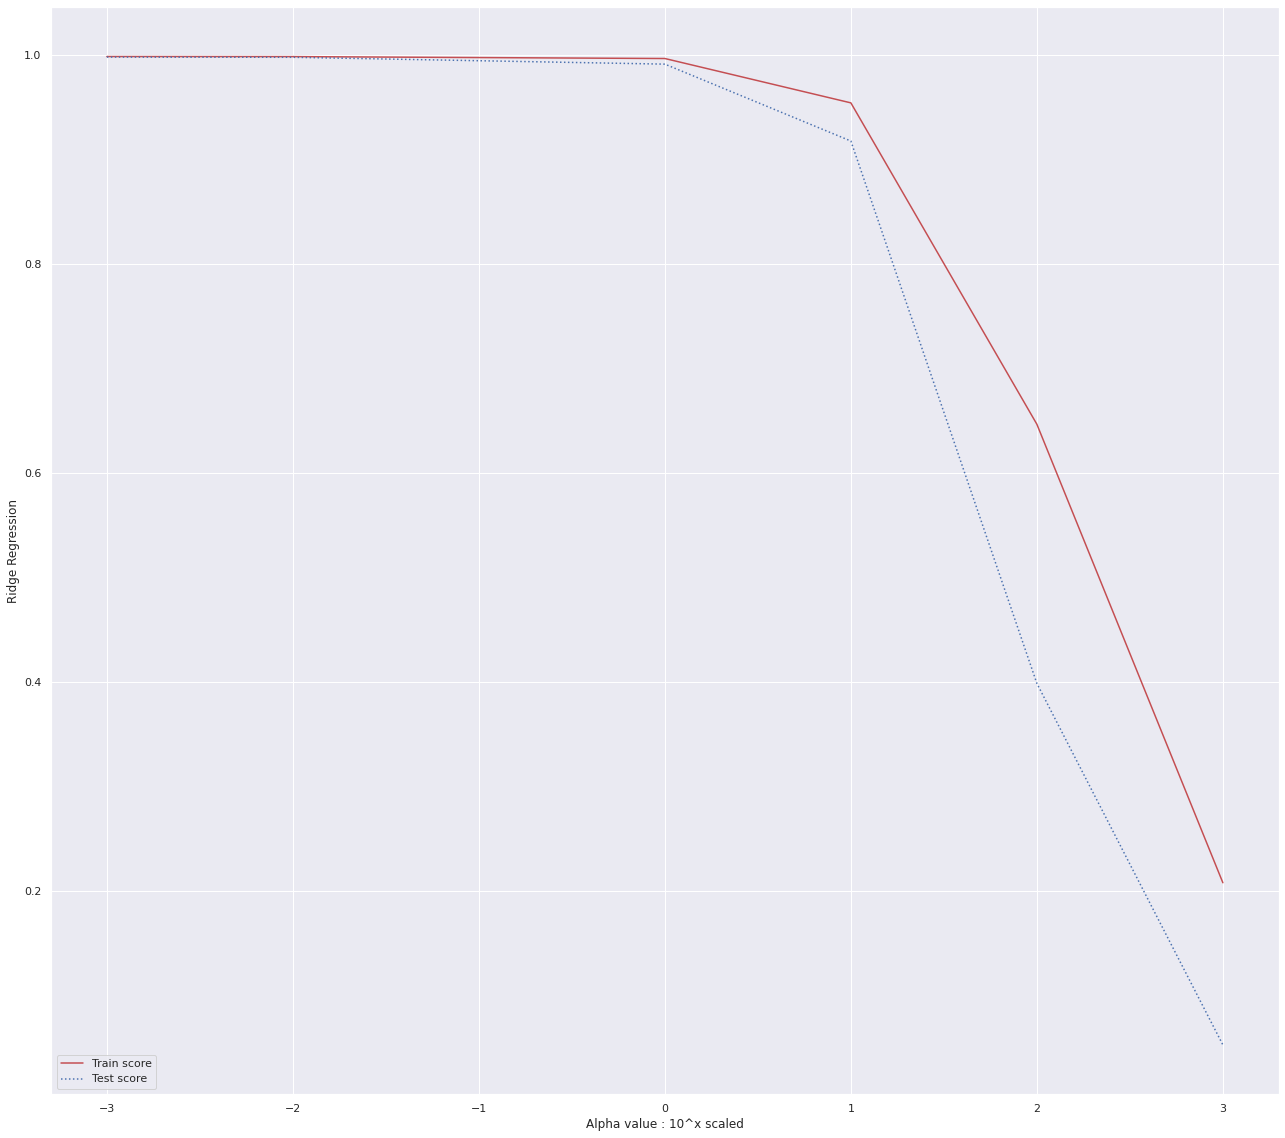

In [26]:
train_scores = []
test_scores = []
alpha_values = [0.001, 0.01, 1, 10, 100, 1000]
for a in alpha_values:
  ridge = Ridge(alpha = a)
  ridge.fit(train_scaled, y_train_scaled)
  train_scores.append(ridge.score(train_scaled, y_train_scaled))
  test_scores.append(ridge.score(test_scaled, y_test_scaled))

plt.plot(np.log10(alpha_values), train_scores, 'r-', label='Train score')
plt.plot(np.log10(alpha_values), test_scores, 'b:', label='Test score')
plt.xlabel('Alpha value : 10^x scaled')
plt.ylabel('Ridge Regression')
plt.legend(loc="lower left")

alpha 값이 0.001에서 10 사이일 때는 릿지 회귀의 규제가 잘 작동하여 좋은 성능을 보여주지만, 벌칙항이 매우 커질 경우 데이터의 평균을 지나는 회귀 함수가 되어 과소 적합을 초래해 나쁜 성능을 보여주는 것을 볼 수 있다.

<br><br>

---

<br><br>

# 심화문제

<br><br>

## 1. 사이킷런에서 제공하는 당뇨병 환자의 데이터를 이용하라.

In [38]:
from sklearn import datasets

diabetes = datasets.load_diabetes()
print(diabetes.data.shape)
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df

(442, 10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


### 1-1. 이 데이터를 70%의 훈련용 데이터와 30%의 테스트용 데이터로 나누어라.

In [48]:
x_data = df[['s1', 's2', 's3', 's4', 's5', 's6']]
y_data = df[['bmi']]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3)

###1-2. 이 데이터에서 체질량 지수(BMI) 속성을 이용하여 당뇨 수치를 예측하는 선형 회귀 모델을 만들자.

In [49]:
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

###1-3. 1-2에서 만든 선형 회귀 모델의 예측 점수를 구하라. 또한 테스트용 데이터에 대하여 이 모델의 점수를 구하라.

In [50]:
print('예측 점수 : ', regr.score(x_train, y_train).round(3))
print('예측 점수 : ', regr.score(x_test, y_test).round(3))

예측 점수 :  0.283
예측 점수 :  0.224


*뭐야 점수 왜이래*

1-4. 당뇨 수치는 25~364 사이의 정수값이다. 이를 StandartScalar를 사용하여 -1에서 1 사이의 실수값으로 스케일링하여 출력하라.

In [51]:
from sklearn.preprocessing import StandardScaler

print('전 : ', regr.score(x_train, y_train).round(3))

ss = StandardScaler() 
ss.fit(x_train)
train_scaled, test_scaled = ss.transform(x_train), ss.transform(x_test)
ss.fit(y_train)
y_train_scaled, y_test_scaled = ss.transform(y_train), ss.transform(y_test) 

from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 10)
ridge.fit(train_scaled, y_train_scaled)

print('후 : ', ridge.score(train_scaled, y_train_scaled).round(3))

전 :  0.283
후 :  0.282


###1-5. 당뇨 수치와 각 속성들의 상관관계를 구하고 히트맵으로 그린다.

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

diabetes = datasets.load_diabetes()
data = []
data = np.append(data, np.array(diabetes))
print(data)

correlation_matrix = life.corr().round(2)
sns.heatmap(data, annot = True)

[{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

IndexError: ignored

*HELP*

###1-6. 이를 바탕으로 상관도가 높은 3개의 속성의 인덱스와 상관계수를 출력해 보자.

### 1-7. 이 상관도를 참고하여 3개의 속성을 입력으로 사용하는 모델을 만들고 모델의 예측 점수를 구해보자.

###1-8. diabetes 데이터의 모든 속성을 사용하여 모델을 만들고 모델의 예측 점수를 구해보자. 또한 테스트용 데이터에 대하여 이 모델의 점수를 구해보자.